<a href="https://colab.research.google.com/github/GMouraBFR/Analise_RealMadrid_Barcelona/blob/main/Analise_RealMadrid_Barcelona1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DOS BALANÇOES FINANCEIROS DE REAL MADRID E BARCELONA

Instalando as dependências

In [144]:
# Execute esta célula para instalar as dependências
!pip install plotly pandas numpy
!pip install seaborn


Importando

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Dados financeiros dos clubes

In [146]:
data = {
    'Metric': ['Receita Total (M€)', 'EBITDA (M€)', 'Dívida Líquida (M€)', 'Wage-to-Revenue (%)',
               'Liquidez Corrente', 'Patrimônio Líquido (M€)', 'Valor de Mercado do Elenco (M€)'],
    'Real Madrid': [843, 180, 265, 54, 1.8, 534, 1030],
    'Barcelona': [800, 100, 680, 65, 0.7, 200, 860]
}
df = pd.DataFrame(data)
df = df.melt(id_vars='Metric', var_name='Clube', value_name='Valor')


Gráfico de Barras Comparativas


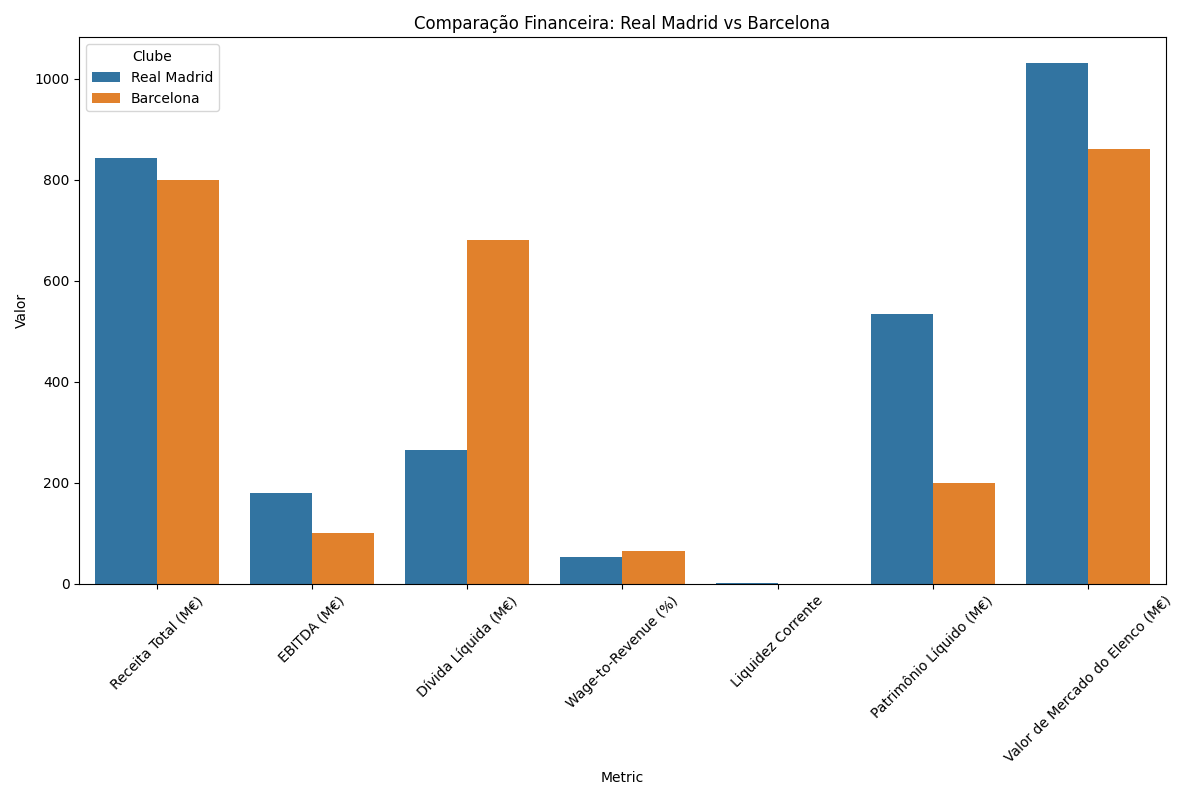

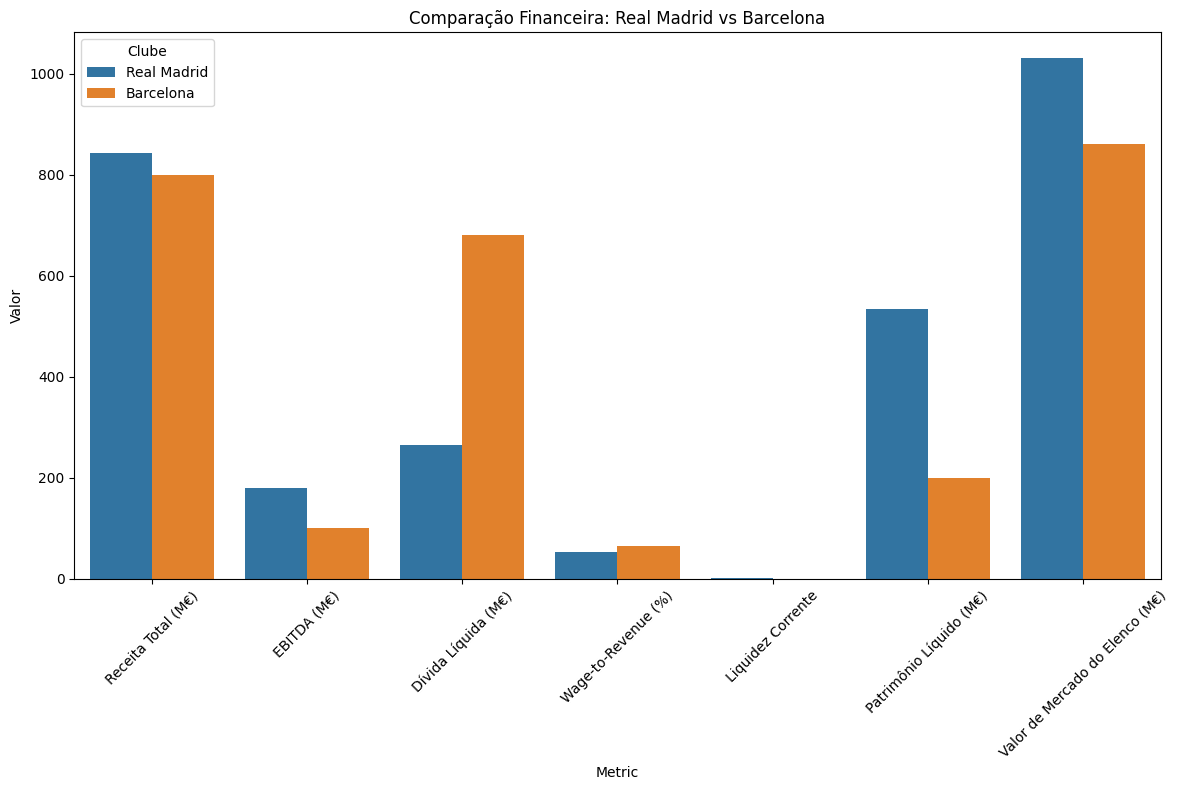

In [147]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Metric', y='Valor', hue='Clube')
plt.title('Comparação Financeira: Real Madrid vs Barcelona')
plt.xticks(rotation=45)
plt.tight_layout()

# Salvar o gráfico como uma imagem estática
plt.savefig('comparacao_financeira_seaborn.png')

# Exibir a imagem no notebook
from IPython.display import Image
Image(filename='comparacao_financeira_seaborn.png')


Análise de Risco Financeiro

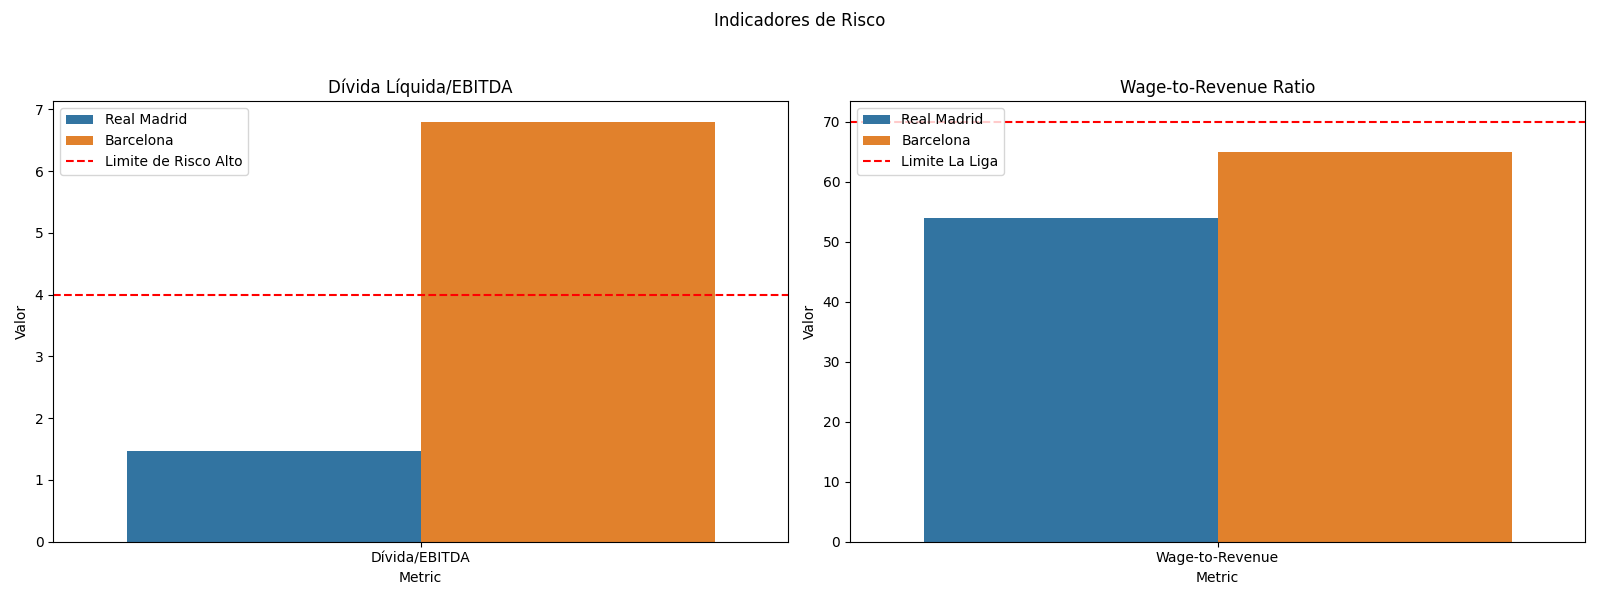

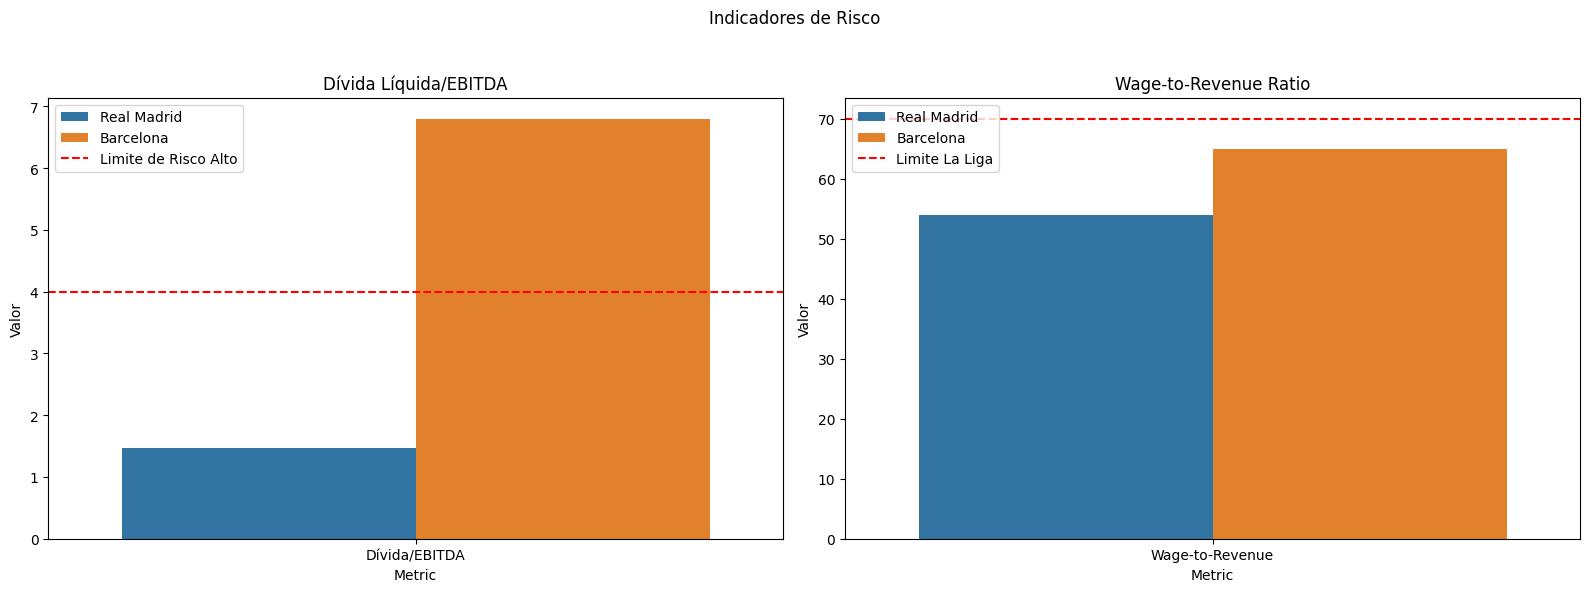

In [148]:
risk_data = {
    'Metric': ['Dívida/EBITDA', 'Wage-to-Revenue'],
    'Real Madrid': [265/180, 54],
    'Barcelona': [680/100, 65]
}
df_risk = pd.DataFrame(risk_data).melt(id_vars='Metric', var_name='Clube', value_name='Valor')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Indicadores de Risco')

# Gráfico Dívida Líquida/EBITDA
sns.barplot(ax=axes[0], data=df_risk[df_risk['Metric'] == 'Dívida/EBITDA'], x='Metric', y='Valor', hue='Clube')
axes[0].set_title('Dívida Líquida/EBITDA')
axes[0].axhline(y=4, color='red', linestyle='--', label='Limite de Risco Alto')
axes[0].legend()

# Gráfico Wage-to-Revenue Ratio
sns.barplot(ax=axes[1], data=df_risk[df_risk['Metric'] == 'Wage-to-Revenue'], x='Metric', y='Valor', hue='Clube')
axes[1].set_title('Wage-to-Revenue Ratio')
axes[1].axhline(y=70, color='red', linestyle='--', label='Limite La Liga')
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])

# Salvar o gráfico como uma imagem estática
plt.savefig('indicadores_de_risco_seaborn.png')

# Exibir a imagem no notebook
from IPython.display import Image
Image(filename='indicadores_de_risco_seaborn.png')


Projeção de Receitas (2023-2026)

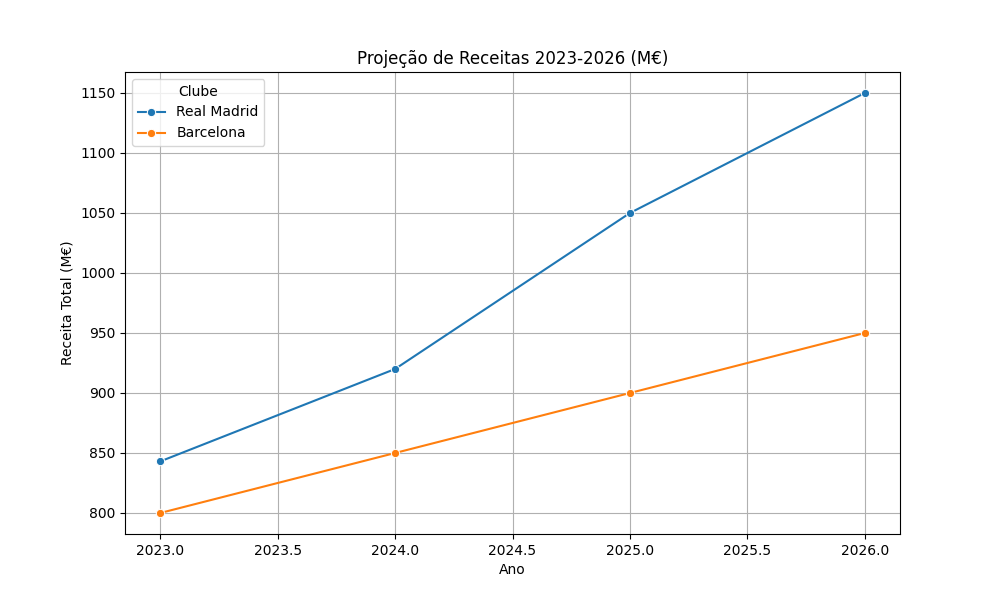

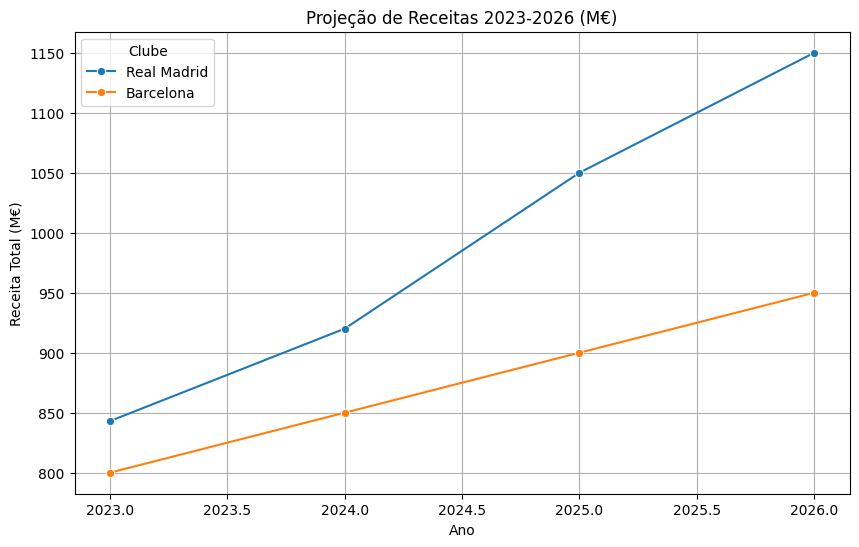

In [149]:
years = [2023, 2024, 2025, 2026]
rm_projection = [843, 920, 1050, 1150]
fcb_projection = [800, 850, 900, 950]

df_projection = pd.DataFrame({
    'Ano': years * 2,
    'Receita Total (M€)': rm_projection + fcb_projection,
    'Clube': ['Real Madrid'] * 4 + ['Barcelona'] * 4
})


plt.figure(figsize=(10, 6))
sns.lineplot(data=df_projection, x='Ano', y='Receita Total (M€)', hue='Clube', marker='o')
plt.title('Projeção de Receitas 2023-2026 (M€)')
plt.xlabel('Ano')
plt.ylabel('Receita Total (M€)')
plt.grid(True)

# Salvar o gráfico como uma imagem estática
plt.savefig('projecao_receitas_seaborn.png')

# Exibir a imagem no notebook
from IPython.display import Image
Image(filename='projecao_receitas_seaborn.png')


Análise de Liquidez (Radar Chart)

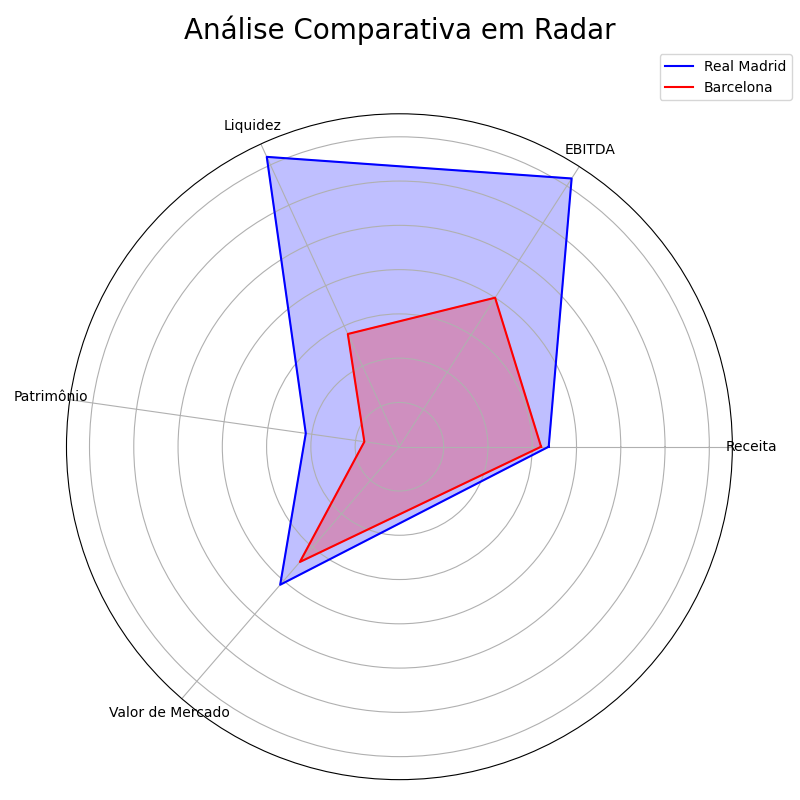

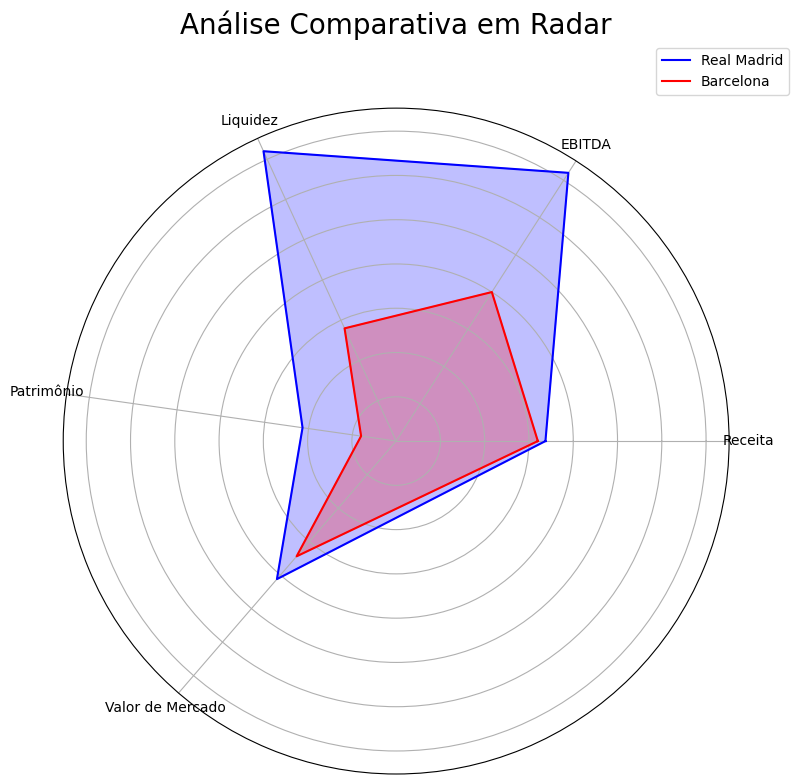

In [150]:
# Dados financeiros dos clubes
data = {
    'Metric': ['Receita Total (M€)', 'EBITDA (M€)', 'Liquidez Corrente', 'Patrimônio Líquido (M€)', 'Valor de Mercado do Elenco (M€)'],
    'Real Madrid': [843/1000, 180/100, 1.8, 534/1000, 1030/1000],
    'Barcelona': [800/1000, 100/100, 0.7, 200/1000, 860/1000]
}
df = pd.DataFrame(data)


# Função para criar os dados do gráfico de radar
def create_radar_data(df, club):
    return [
        df[df['Metric'] == 'Receita Total (M€)'][club].values[0],
        df[df['Metric'] == 'EBITDA (M€)'][club].values[0],
        df[df['Metric'] == 'Liquidez Corrente'][club].values[0],
        df[df['Metric'] == 'Patrimônio Líquido (M€)'][club].values[0],
        df[df['Metric'] == 'Valor de Mercado do Elenco (M€)'][club].values[0]
    ]

metrics = ['Receita', 'EBITDA', 'Liquidez', 'Patrimônio', 'Valor de Mercado']
real_madrid_values = create_radar_data(df, 'Real Madrid')
barcelona_values = create_radar_data(df, 'Barcelona')

# Adicionar o primeiro valor no final para fechar o gráfico
real_madrid_values += real_madrid_values[:1]
barcelona_values += barcelona_values[:1]
metrics += metrics[:1]

# Configurar o gráfico de radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(metrics, real_madrid_values, color='blue', alpha=0.25)
ax.fill(metrics, barcelona_values, color='red', alpha=0.25)

# Adicionar as linhas e os pontos
ax.plot(metrics, real_madrid_values, color='blue', label='Real Madrid')
ax.plot(metrics, barcelona_values, color='red', label='Barcelona')

# Configurar as etiquetas e o título
ax.set_yticklabels([])
ax.set_title('Análise Comparativa em Radar', size=20, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout()

# Salvar o gráfico como uma imagem estática
plt.savefig('analise_comparativa_radar_seaborn.png')

# Exibir a imagem no notebook
from IPython.display import Image
Image(filename='analise_comparativa_radar_seaborn.png')


# Vamos incluir em nossa análise APIs, Machine Learning e análise de sensibilidade .

Aplicamos técnicas de Machine Learning para prever a probabilidade de falência dos clubes de futebol utilizando o modelo de Altman Z-Score

In [151]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Dados para o modelo de Altman Z-Score
data_altman = {
    'Clube': ['Real Madrid', 'Barcelona', 'Manchester United', 'Juventus'],
    'WC_TA': [0.15, -0.05, 0.10, 0.08],  # Capital de Giro / Ativos Totais
    'RE_TA': [0.30, -0.20, 0.25, 0.15],  # Lucros Retidos / Ativos Totais
    'EBIT_TA': [0.12, 0.05, 0.08, 0.06], # EBIT / Ativos Totais
    'MVE_TL': [2.5, 0.8, 1.2, 1.0],      # Valor de Mercado / Passivo Total
    'Falido': [0, 1, 0, 0]               # 1 = Falência, 0 = Saudável
}
df_altman = pd.DataFrame(data_altman)
X = df_altman[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_TL']]
y = df_altman['Falido']

# Treinar modelo
model = LogisticRegression()
model.fit(X, y)

# Previsão para Barcelona 2024
novo_clube_barcelona = np.array([[0.10, -0.15, 0.07, 0.9]])  # Exemplo: Barcelona 2024
novo_clube_barcelona_df = pd.DataFrame(novo_clube_barcelona, columns=['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_TL'])
predicao_barcelona = model.predict_proba(novo_clube_barcelona_df)[0][1]

# Previsão para Real Madrid 2024
novo_clube_real_madrid = np.array([[0.15, 0.30, 0.12, 2.5]]) # Exemplo: Real Madrid 2024
novo_clube_real_madrid_df = pd.DataFrame(novo_clube_real_madrid, columns=['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_TL'])
predicao_real_madrid = model.predict_proba(novo_clube_real_madrid_df)[0][1]

# Resultados
print(f"\nProbabilidade de falência (Barcelona 2024): {predicao_barcelona*100:.1f}%")
print(f"\nProbabilidade de falência (Real Madrid 2024): {predicao_real_madrid*100:.1f}%")



Probabilidade de falência (Barcelona 2024): 30.0%

Probabilidade de falência (Real Madrid 2024): 15.9%


# **Análise de sensibilidade**

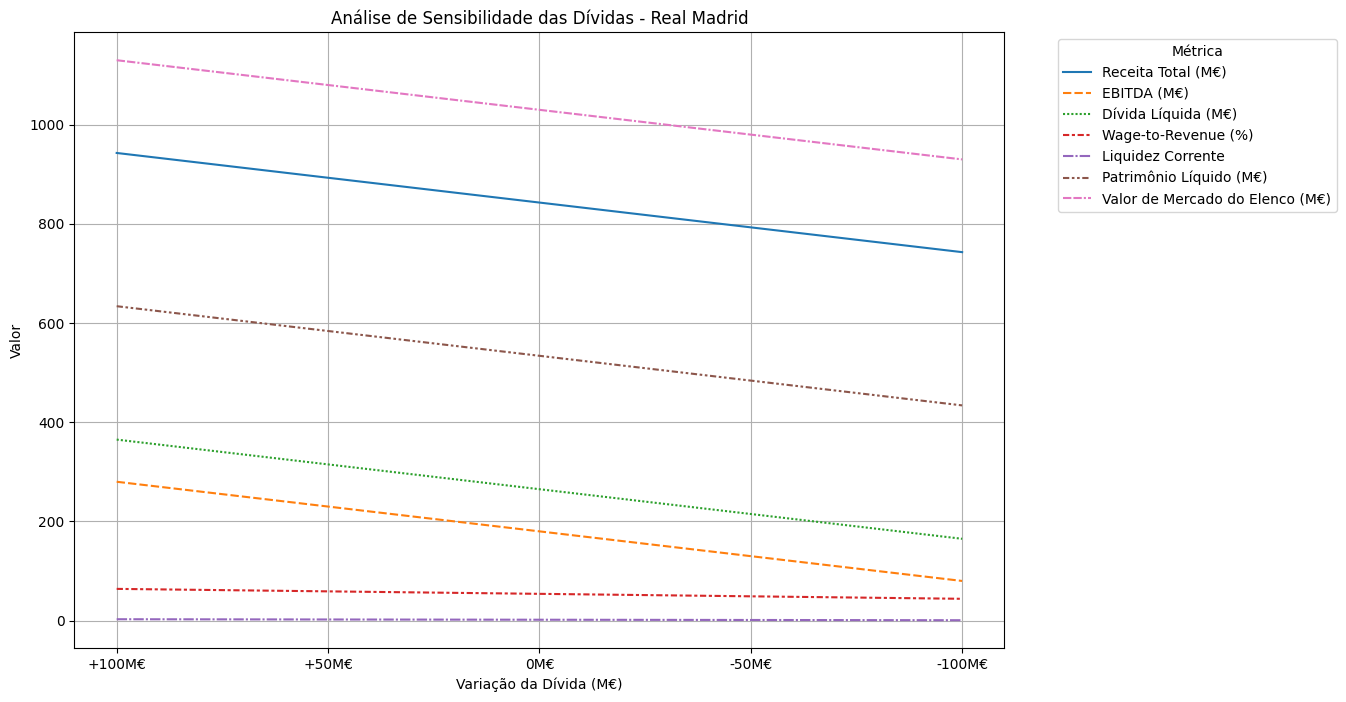

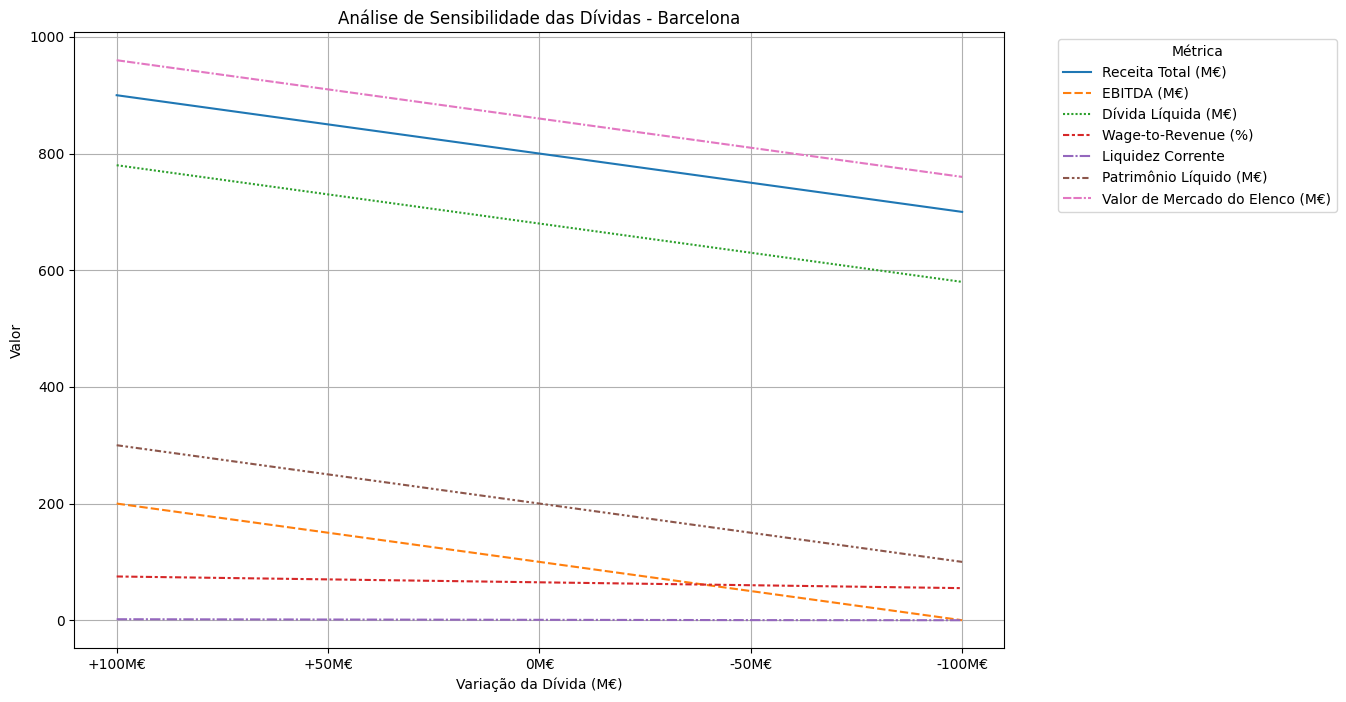

In [152]:
# Dados para Real Madrid
real_madrid_sensitivity = {
    '+100M€': [943, 280, 365, 64, 2.8, 634, 1130],
    '+50M€': [893, 230, 315, 59, 2.3, 584, 1080],
    '0M€': [843, 180, 265, 54, 1.8, 534, 1030],
    '-50M€': [793, 130, 215, 49, 1.3, 484, 980],
    '-100M€': [743, 80, 165, 44, 0.8, 434, 930]
}
df_rm_sensitivity = pd.DataFrame(real_madrid_sensitivity, index=['Receita Total (M€)', 'EBITDA (M€)', 'Dívida Líquida (M€)', 'Wage-to-Revenue (%)', 'Liquidez Corrente', 'Patrimônio Líquido (M€)', 'Valor de Mercado do Elenco (M€)']).T

# Dados para Barcelona
barcelona_sensitivity = {
    '+100M€': [900, 200, 780, 75, 1.7, 300, 960],
    '+50M€': [850, 150, 730, 70, 1.2, 250, 910],
    '0M€': [800, 100, 680, 65, 0.7, 200, 860],
    '-50M€': [750, 50, 630, 60, 0.2, 150, 810],
    '-100M€': [700, 0, 580, 55, 0, 100, 760]
}
df_ba_sensitivity = pd.DataFrame(barcelona_sensitivity, index=['Receita Total (M€)', 'EBITDA (M€)', 'Dívida Líquida (M€)', 'Wage-to-Revenue (%)', 'Liquidez Corrente', 'Patrimônio Líquido (M€)', 'Valor de Mercado do Elenco (M€)']).T

# Análise de Sensibilidade das Dívidas para Real Madrid
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_rm_sensitivity)
plt.title('Análise de Sensibilidade das Dívidas - Real Madrid')
plt.xlabel('Variação da Dívida (M€)')
plt.ylabel('Valor')
plt.legend(title='Métrica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Salvar o gráfico como uma imagem estática
plt.savefig('sensibilidade_dividas_real_madrid_seaborn.png')

# Exibir a imagem no notebook
plt.show()

# Análise de Sensibilidade das Dívidas para Barcelona
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_ba_sensitivity)
plt.title('Análise de Sensibilidade das Dívidas - Barcelona')
plt.xlabel('Variação da Dívida (M€)')
plt.ylabel('Valor')
plt.legend(title='Métrica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Salvar o gráfico como uma imagem estática
plt.savefig('sensibilidade_dividas_barcelona_seaborn.png')

# Exibir a imagem no notebook
plt.show()


Conclusão deste analista


Receitas e EBITDA:

O Real Madrid apresenta uma Receita Total e um EBITDA superiores aos do Barcelona, indicando uma maior capacidade de geração de receitas e lucros operacionais.

Dívida Líquida e Endividamento:

O Barcelona possui uma Dívida Líquida significativamente maior em comparação ao Real Madrid. Consequentemente, o seu índice de endividamento é mais elevado, sugerindo maiores riscos financeiros.

Taxa Wage-to-Revenue:

O Barcelona tem uma relação salário/receita mais alta, o que pode indicar uma pressão maior sobre as finanças do clube devido aos elevados salários dos jogadores.

Liquidez Corrente:

O Real Madrid apresenta uma Liquidez Corrente mais robusta, indicando uma melhor capacidade de cobrir suas obrigações de curto prazo.

Patrimônio Líquido e Valor de Mercado do Elenco:

O Real Madrid também possui um Patrimônio Líquido e um Valor de Mercado do Elenco mais altos, reforçando sua posição financeira mais estável.

Projeções Futuras e Previsões de Falência:
Projeções de Receitas:

Ambos os clubes estão projetando um crescimento nas receitas nos próximos anos, com o Real Madrid mantendo uma vantagem sobre o Barcelona.

Previsão de Falência para 2024:

A probabilidade de falência do Barcelona em 2024 é de 30%, enquanto a do Real Madrid é muito menor, refletindo a diferença na saúde financeira dos dois clubes.

Análise de Sensibilidade das Dívidas:
Impacto das Variações na Dívida:

O Real Madrid mostra uma maior resiliência a variações na dívida, mantendo índices de endividamento e lucros líquidos mais estáveis em diferentes cenários de dívida.

O Barcelona, por outro lado, é mais sensível a variações na dívida, com impactos significativos em seu endividamento e lucros líquidos.

Conclusão Final:
O Real Madrid está em uma posição financeira mais sólida em comparação com o Barcelona. Possui maiores receitas, melhor liquidez e menor endividamento. Embora ambos os clubes estejam projetando crescimento nas receitas futuras, o Barcelona enfrenta desafios mais sérios em termos de endividamento e pressão salarial, o que pode afetar sua estabilidade financeira a longo prazo.

Esta análise detalhada fornece uma visão abrangente da saúde financeira dos dois clubes e pode ser utilizada para tomar decisões estratégicas informadas para assegurar sua sustentabilidade e sucesso contínuo.